# Inspiración de los modelos de redes neuronales 

La idea que ánimo los modelos de redes neuronales fue la de imitar el sistema de computación más complejo de los que se conocen hasta ahora, que es el cerebro. El cerebro esta formado por millones de células llamadas neuronas. Estas neuronas son unos procesadores de información muy sencillos con un canal de entrada de información (dendritas), un órgano de cómputo (soma) y un canal de salida de información (axón). 


<img src="https://docs.google.com/uc?export=download&id=19l1cRCQgTVpeHd9I9STGKUYTUa9kozPm" height=250 width=250> </img>




# Redes Neuronales Artificiales 

La representación más común de una red neuronal artificial se encuentra en la siguiente figura: 


<img src="https://docs.google.com/uc?export=download&id=1iVNhc7Vxa35Xc_dcnvuWnHsSPWqgXgIl" height=250 width=450> </img>





Su representación matemática es la siguiente: 

$$ n_k = w_{k,0} + \sum w_{k,i} * x_i $$

$$ \hat{y_k} = F(n_k) $$

Los valores $x_i$ representan las entradas que son variables que nos van a permitir predecir la salida de la red neuronal, a los valores $w_{k,i}$ se les conoce como pesos, en un principio estos valores son desconocidos y usaremos algoritmos para encontrar estos valores. El término $w_{k,0}$ se le conoce como bias. F es una función conocida como función de activación la cual permite introducir no-linealidad en la red neuronal. 

**Nota**: El término $\hat{y_k}$ denota que estamos aproximando el valor de $y_k$.

# La función lógica AND 

Como ejemplo clásico de los problemas que, en principio, modelaron las
redes neuronales y que a su vez nos permitirá mostrar cómo funciona una
neurona, simularemos la función lógica AND la cual viene definida por la
tabla: 

| X1 | X2 | X1 AND X2 |
|----|----|-----------|
| 0  | 0  | 0         |
| 0  | 1  | 0         |
| 1  | 0  | 0         |
| 1  | 1  | 1         |

Usando NumPy vamos a emular la función lógica AND usando una red neuronal con la siguiente función de activación: 

$$ F(n_k) = \left\{
\begin{array}{c l}
 1 & \textrm{si } n_k > 0  \\
 0 & \textrm{si } n_k \le 0 
\end{array}
\right.
$$


In [0]:
import numpy as np 

# Definimos pesos, bias, entradas y salidas de la red neuronal.
pesos = np.array([[1, 1]])
bias = -1.0
entradas = np.array([[0, 0], [0,1], [1, 0], [1, 1]])
salidas = np.array([[0, 0, 0, 1]])

In [0]:
resultado = np.matmul(entradas, pesos.T) + bias
resultado = resultado.T

In [0]:
resultado

array([[-1.,  0.,  0.,  1.]])

In [0]:
# Función de activación
def activation(x):
  if x > 0: 
    return 1 
  else: 
    return 0 

In [0]:
activation = np.vectorize(activation) # Para aplicar la función de activación
                                      # a cada elemento del NumPy array usamos  
                                      # np.vectorize.

print(activation(resultado))

[[0 0 0 1]]


In [0]:
# Comparamos la salida de la red neuronal con el vector de salidas.
activation(resultado) == salidas

array([[ True,  True,  True,  True]])

Resulta que la red neuronal reproduce la función lógica AND. A continuación se muestra las regiones de decisión que produce este modelo. 

\

<img src="https://docs.google.com/uc?export=download&id=1BDhMrAk0F21EMJsB8BXHySikEUtK61EL" height=250 width=350> </img>



## La función lógica XOR 

El anterior problema es linealmente separable este tipo de problema tiene la característica de ser resueltos mediante regiones de decisión lineales tales como una recta en el plano cartesiano.

Existen problemas que no son separables linealmente y hay que recurrir a modelos más complejos. Un ejemplo clásico de este tipo de problema es la función lógica XOR la cual tiene asociada la siguiente tabla: 


| X1 | X2 | X1 XOR X2 |
|----|----|-----------|
| 0  | 0  | 0         |
| 0  | 1  | 1         |
| 1  | 0  | 1         |
| 1  | 1  | 0         |






Para resolver este problema tomaremos dos redes neuronales y las combinaremos lo cual se ilustra en la siguiente figura. 


<img src="https://docs.google.com/uc?export=download&id=18li4bYQj50gZet5ptd0k7Dmfj85LpewR" height=250 width=450> </img>

El siguiente código en Python reproduce la función lógica XOR. 

In [0]:
entradas = np.array([[0, 0], [0,1], [1, 0], [1, 1]]) # Función lógica XOR 
salidas = np.array([[0, 1, 1, 0]])


In [0]:
pesos_neurona1 = np.array([[1, 1]])  # Calculamos la salida de la neurona h1 
bias_neurona1 = 0 

salida_neurona1 = np.matmul(entradas, pesos_neurona1.T) + bias_neurona1
salida_neurona1 = salida_neurona1.T
h1 =  activation(salida_neurona1)
print(h1)

[[0 1 1 1]]


In [0]:
pesos_neurona2 = np.array([[-1, -1]]) # Calculamos la salida de la neurona h2
bias_neurona2 = 1.5

salida_neurona2 = np.matmul(entradas, pesos_neurona2.T) + bias_neurona2
salida_neurona2 = salida_neurona2.T
h2 =  activation(salida_neurona2)
print(h2)

[[1 1 1 0]]


In [0]:
pesos_neurona_salida = np.array([[1, 1]])  # La salida de h1 y h2 se 
bias_neurona_salida = -1                   # convierte en la entrada de la 
                                           # neurona de salida.

salida_n1_n2 =  np.concatenate((h1, h2), axis=1).reshape(4, 2)                                            

In [0]:
resultado_final = np.matmul(salida_n1_n2, pesos_neurona_salida.T) + bias_neurona_salida
resultado_final = resultado_final.T

In [0]:
resultado_final == salidas

array([[ True,  True,  True,  True]])

Podemos ilustrar nuestro modelo de manera gráfica por medio de la siguiente figura: 


<img src="https://docs.google.com/uc?export=download&id=1vH4ZYrOMgyYQzvkYyeYRtjDXhNyIgQ9C" height=250 width=350> </img>







Reflexionemos un poco sobre la solución encontrada al problema de modelar la función XOR. Observando la anterior figura  podemos encontrar dos neuronas, una implementa la decisión lineal DL1 (H1) y la otra la decisión lineal DL2 (H2). La neurona que combina a las neuronas H1 y H2 se activa únicamente cuando la neurona correspondiente a DL1 esta activada y DL2 desactivada, esto es precisamente lo que hace el código anterior. El anterior modelo es conocido como perceptrón multicapa (MLP) y es ampliamente citado en la literatura de redes neuronales. Un perceptron multicapa tiene tres tipos de neuronas de entrada, ocultas y salidas lo cual se muestra en la siguiente figura.




<img src="https://docs.google.com/uc?export=download&id=1qyDLGjrRhWNMWb9-zm5bkM52O9G8r8ta" height=450 width=650> </img>

A medida que se incrementa el número de neuronas ocultas la red neuronal tiene una mayor capacidad de representar patrones más complejos. 


# Entrenamiento de una red neuronal 

Surge la pregunta como obtengo los pesos del modelo MLP, para lograr esto primero defino lo que se conoce como función de perdida la cual permite medir la idoneidad de los pesos de la red neuronal. En problemas de clasificación binaria se suele usar la cross entropy la cual se define de la siguiente manera:

$$ -\frac{1}{N} \sum_{n=1}^{N} y_n \log \hat{y_n} + (1-y_n) \log({1-\hat{y_n}})   $$ 

**Nota**: $y_n$ son valores 0 o 1 y $\hat{y_n}$ es un valor entre 0 y 1 que representa la probabilidad de que el modelo prediga la clase 1 en el individuo n-ésimo. 

Una vez defino mi función de perdida puedo hacer uso de algoritmos de optimización como el gradiente estocastico los cuales actualizan los pesos segun la siguiente regla: 

$$
w \leftarrow w - \eta (\alpha \frac{\partial R(w)}{\partial w}
+ \frac{\partial L(w^T x_i + b, y_i)}{\partial w}) $$

El parámetro $ \eta $ se conoce como tasa de aprendizaje, valores muy altos pueden hacer que el algoritmo oscile y valores muy pequeños pueden retrasar el tiempo de ejecución del algoritmo, por lo tanto $ \eta $ es un parámetro que debe ser establecido por medio de experimentación. 

Los términos que involucran el símbolo $ \partial $ permitan al algoritmo concentrarse en direcciones donde la función de perdida decrese más y por tanto estaria más cerca de una solución.

A continuación vamos a hacer uso de la libreria scikit-learn para ver como funciona el modelo MLP con datos simulados, esto es algo que se suele con fines pedagógicos, para concentrarnos en como las redes neuronales trabajan y no en detalles específicos de un conjunto de datos.

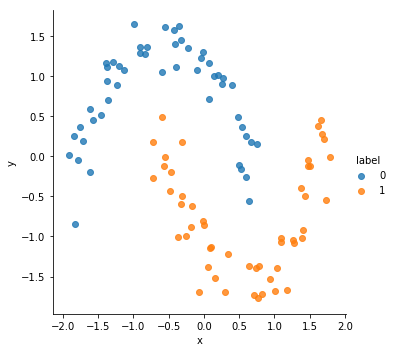

In [0]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# generando datos simulados
X, y = make_moons(n_samples=100, noise=0.1)

# Escalamos los datos a que tengan media 0 y desviación 1.
# Esta operación nos permitirá que nuestro algoritmo trabaje mejor.
scaler = StandardScaler()
X = scaler.fit_transform(X)


dictionario = {'x' : X[:,0], 
               'y' : X[:,1], 
               'label' : y }

# Usamos un pandas dataframe para almacenar los datos y 
# luego graficarlos.

datos = pd.DataFrame(dictionario)

sns.lmplot('x', 'y', data=datos, hue='label', fit_reg=False)
plt.show()

El patron anterior es claramente no-lineal, a continuación crearemos una instancia de la clase MLPClassifier configurando el número de capas ocultas en 10 y estableciendo como función de activación la función logística: 

$ f(x) = \frac{1}{1 + \exp{-x}} $

Además como método de optimización usaremos el descendo del gradiente estocástico, la tasa de aprendizaje es 0.001 y el máximo número de iteraciones es 50000.

In [0]:


from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = 50

mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes), activation='logistic', solver='sgd',  
                    max_iter=50000, learning_rate_init=0.001, verbose=True)



La siguiente celda de código realiza el proceso de entrenamiento con lo que obtenemos valores para los pesos de la red neuronal.

In [0]:
mlp.fit(X,y)

Realizamos prediciones sobre los datos y calculamos el porcentaje de datos clasificados correctamente. 

In [0]:
predictions = mlp.predict(X)
from sklearn.metrics import accuracy_score
print(accuracy_score(y, predictions))

0.85


En la celda anterior nos tendria que dar un valor cercano a 0.85 esto nos dice que el modelo clasifica correctamente alrededor del 85% de los datos. 

**Ejercicio**: Repetir el proceso anterior con el siguiente conjunto de datos. 

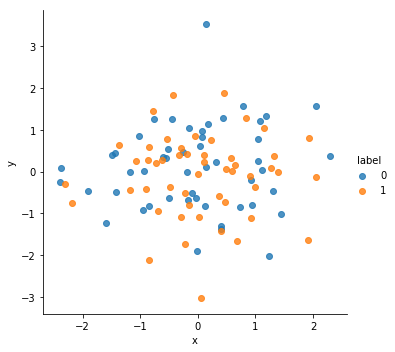

In [0]:
from sklearn.datasets import make_classification

# generando datos simulados
X, y = make_classification(n_samples=100)


X = scaler.fit_transform(X)


dictionario = {'x' : X[:,0], 
               'y' : X[:,1], 
               'label' : y }
datos = pd.DataFrame(dictionario)

sns.lmplot('x', 'y', data=datos, hue='label', fit_reg=False)
plt.show()
